In [78]:
import numpy as np
import pandas as pd

In [80]:
df = pd.read_csv("/content/Churn__Modelling.csv")

In [81]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [83]:
df.duplicated().sum()

0

In [84]:
df["Exited"].value_counts()

,count
Exited,
0,7963
1,2037


In [85]:
df["Geography"].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [86]:
df["Gender"].value_counts()

,count
Gender,
Male,5457
Female,4543


In [87]:
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)

In [88]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [90]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [91]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [92]:
df['Geography_Germany'] = df['Geography_Germany'].astype(int)
df['Geography_Spain'] = df['Geography_Spain'].astype(int)
df['Gender_Male'] = df['Gender_Male'].astype(int)

In [93]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [94]:
X = df.drop(columns=['Exited'])
y = df['Exited'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [97]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [98]:
X_train_scaled

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [99]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [122]:
model = Sequential()

model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [123]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_17 (Dense)                     │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 1)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [137]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [138]:
history = model.fit(X_train,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7051 - loss: 21.3200 - val_accuracy: 0.7969 - val_loss: 12.4165
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7209 - loss: 11.7665 - val_accuracy: 0.6488 - val_loss: 23.8546
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7097 - loss: 12.3745 - val_accuracy: 0.7738 - val_loss: 8.0110
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7096 - loss: 11.0448 - val_accuracy: 0.4881 - val_loss: 19.8455
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7094 - loss: 11.1059 - val_accuracy: 0.7987 - val_loss: 25.8060
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7033 - loss: 14.1509 - val_accuracy: 0.7962 - val_loss: 17.9936
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7084 - loss: 10.8045 - val_accuracy: 0.7937 - val_loss: 20.2467
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6966 - loss: 13.8

In [139]:
model.layers[0].get_weights()

[array([[-4.5779541e-02, -2.4315283e-01,  3.9380461e-01,  2.0978561e-01,
          5.5185872e-01, -4.8128616e-02, -1.7739008e-01,  1.8496160e-01,
         -5.2368593e-01,  1.4006370e-02,  3.5881320e-01],
        [-1.9459260e+00,  4.2747405e-01, -2.5507765e+00,  1.6919669e+00,
          7.7192587e-01, -1.2349733e+00, -2.3740454e+00,  2.0467188e+00,
          1.1607525e+00,  1.9370668e+00,  1.5208465e+00],
        [ 2.3873571e-01, -4.7517788e-01,  6.8758512e-01, -2.1962841e+00,
         -9.5633960e-01,  1.4532975e+00,  8.7775940e-01, -1.0279953e+00,
         -7.4750364e-01, -1.3496790e+00,  4.5367914e-01],
        [-1.4388762e-01, -1.9925530e-01,  4.1865954e-01,  1.3936366e-01,
         -3.0132607e-01, -1.1212788e-01, -8.8839926e-02,  3.3698875e-01,
         -1.5740696e-03,  2.5794804e-01, -3.4058031e-02],
        [ 3.5434415e+00, -5.4063210e+00, -2.1842802e+00,  1.0792459e+00,
         -5.1621766e+00,  1.8978560e+00, -3.9148250e+00,  1.3047370e+00,
          4.6998215e-01, -7.3663300e-0

In [140]:
y_log = model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [141]:
y_pred = np.where(y_log>0.5,1,0)
y_pred

array([[1],
       [1],
       [0],
       ...,
       [0],
       [0],
       [1]])

In [143]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6675

In [146]:
history.history

{'accuracy': [0.7143750190734863,
  0.715624988079071,
  0.711718738079071,
  0.7126562595367432,
  0.710156261920929,
  0.70703125,
  0.7095312476158142,
  0.7073437571525574,
  0.7137500047683716,
  0.7093750238418579,
  0.7154687643051147,
  0.7034375071525574,
  0.7084375023841858,
  0.7174999713897705,
  0.7143750190734863,
  0.7137500047683716,
  0.7082812786102295,
  0.6971874833106995,
  0.7121875286102295,
  0.706250011920929,
  0.7073437571525574,
  0.714062511920929,
  0.7082812786102295,
  0.7076562643051147,
  0.7165625095367432,
  0.7121875286102295,
  0.7126562595367432,
  0.711718738079071,
  0.7114062309265137,
  0.7290624976158142,
  0.7048437595367432,
  0.711718738079071,
  0.7220312356948853,
  0.7079687714576721,
  0.715624988079071,
  0.7196875214576721,
  0.7087500095367432,
  0.7170312404632568,
  0.7056249976158142,
  0.7099999785423279,
  0.7185937762260437,
  0.7053124904632568,
  0.7143750190734863,
  0.7085937261581421,
  0.6996874809265137,
  0.7181249856

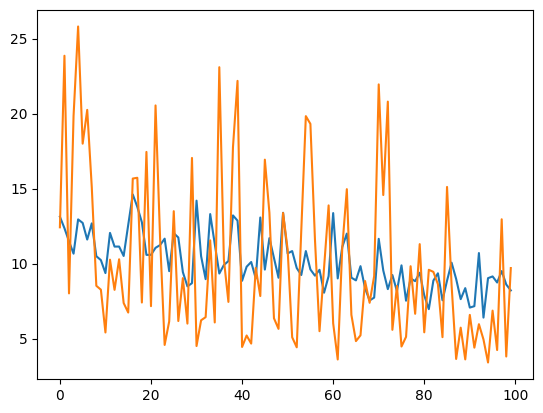

In [144]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

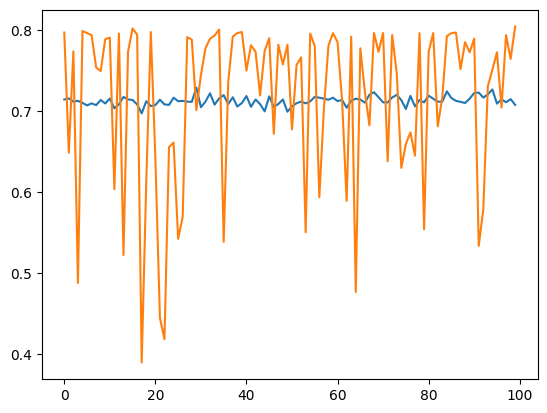

In [147]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])